In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [18]:
# 1. Generate Synthetic Dataset
def generate_dataset(num_samples, num_features, noise=0.1):
    #np.random.seed(42)  # For reproducibility
    X = np.random.randn(num_samples, num_features)  # Matrix of order num_samples x num_features
    true_weights = np.random.randn(num_features)   
    true_bias = np.random.randn()
    y = X @ true_weights + true_bias + noise * np.random.randn(num_samples)
    return X, y, true_weights, true_bias

In [3]:
# Matrix Inversion Solution
def matrix_inversion_solution(X, Y):
    X_matrix = np.hstack((np.ones((X.shape[0], 1)), X))
    Y_matrix = Y.reshape(-1, 1)
    
    # Use the normal equation: theta = (X^T X)^{-1} X^T Y
    X_transpose_X = np.dot(X_matrix.T, X_matrix)
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    X_transpose_Y = np.dot(X_matrix.T, Y_matrix)
    
    theta = np.dot(X_transpose_X_inv, X_transpose_Y)
    return theta  # Return weight vector

In [4]:
# 2. Gradient Descent Implementation
def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    # Initialize weight vector and bias
    weights = np.zeros(num_features)
    bias = 0.0
    
    # To store the loss at each iteration
    loss_history = []

    for i in range(num_iterations):
        # Compute predictions
        y_pred = X @ weights + bias

        
        # Compute loss (Mean Squared Error)
        loss = np.mean((y_pred - y) ** 2)
        loss_history.append(loss)
        
        
        # Compute gradients
        dw = (2 / num_samples) * (X.T @ (y_pred - y))
        db = (2 / num_samples) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db
        
        
        
    # Compute final loss (Mean Squared Error)
    y_pred = X @ weights + bias
    loss = np.mean((y_pred - y) ** 2)

    return weights, bias, loss, loss_history

In [5]:
# Generate data
# Example with one feature

num_samples = 10
num_features = 1
X, y, true_weights, true_bias = generate_dataset(num_samples, num_features)
#print("True Weights:", true_weights)
#print("True Bias:", true_bias)

# Generated data
print("X: ",X)
print("y: ",y)

X:  [[ 1.58348349]
 [ 0.46060548]
 [ 0.3401341 ]
 [-1.19696481]
 [ 0.31904735]
 [ 2.34670381]
 [ 0.21337061]
 [ 0.68104992]
 [-0.98483886]
 [-1.88065721]]
y:  [-0.32608629 -0.52076677 -0.73669792 -1.43319012 -0.83892641 -0.03323545
 -0.75463545 -0.61699176 -1.16681518 -1.58920257]


In [6]:
# Matrix Inversion Solution
start_time1 = time.time()
w_vector = matrix_inversion_solution(X, y)
matrix_inv_time = time.time() - start_time1
    
print("Time taken by matrix inversion solution: ",matrix_inv_time," seconds")
print("Matrix Inversion solution: ",w_vector)

# Here the first component of w_vector is the bias and the second component is the weight

print("\nBias computed by matrix inversion solution: ", w_vector[0])
print("Weight computed by matrix inversion solution: ", w_vector[1])

Time taken by matrix inversion solution:  0.16553735733032227  seconds
Matrix Inversion solution:  [[-0.87192059]
 [ 0.37337015]]

Bias computed by matrix inversion solution:  [-0.87192059]
Weight computed by matrix inversion solution:  [0.37337015]


In [7]:
# Perform Gradient Descent
learning_rate = 0.1
num_iterations = 100

start_time2 = time.time()
learned_weights, learned_bias, loss, loss_history = gradient_descent(X, y, learning_rate, num_iterations)

gradient_descent_time = time.time() - start_time2
print("\nTime taken by gradient descent: ", gradient_descent_time," seconds")
    
print("\nLearned Weight:", learned_weights)
print("Learned Bias:", learned_bias)


# Compare true and learned weights and bias
#print("\nDifference between true and learned biases:", true_bias - learned_bias)          # This is a scalar
#print("\nDifference between true and learned weights:", true_weights - learned_weights)   # This is a vector


print("Loss (Mean squared error) with the learned weight and learned bias:", loss)


Time taken by gradient descent:  0.0  seconds

Learned Weight: [0.37337015]
Learned Bias: -0.8719205842983749
Loss (Mean squared error) with the learned weight and learned bias: 0.006308080945319044


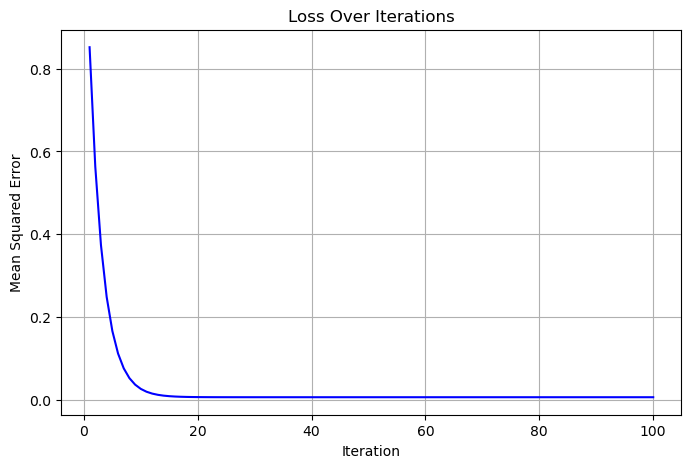

In [8]:
# Plot the loss over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), loss_history, color='blue')
plt.title("Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

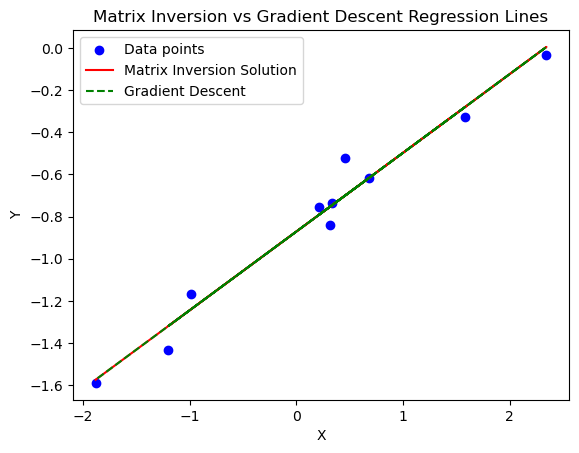

In [9]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X @ w_vector[1] + w_vector[0,0], color='red', label='Matrix Inversion Solution')  
plt.plot(X, X @ learned_weights + learned_bias, color='green', linestyle='--', label='Gradient Descent')
plt.title('Matrix Inversion vs Gradient Descent Regression Lines')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [10]:
# Suppose the learning rate is too high.


# Perform Gradient Descent
learning_rate = 2
num_iterations = 100

start_time2 = time.time()
learned_weights, learned_bias, loss, loss_history = gradient_descent(X, y, learning_rate, num_iterations)

gradient_descent_time = time.time() - start_time2
print("\nTime taken by gradient descent: ", gradient_descent_time," seconds")
    
print("\nLearned Weights:", learned_weights)
print("Learned Bias:", learned_bias)


# Compare true and learned weights and bias
#print("\nDifference between true and learned biases:", true_bias - learned_bias)          
#print("\nDifference between true and learned weights:", true_weights - learned_weights)   


print("Loss (Mean squared error) with the learned weights and learned bias:", loss)


Time taken by gradient descent:  0.0  seconds

Learned Weights: [-3.53517141e+70]
Learned Bias: -1.2024068510567017e+70
Loss (Mean squared error) with the learned weights and learned bias: 2.1658050796887306e+141


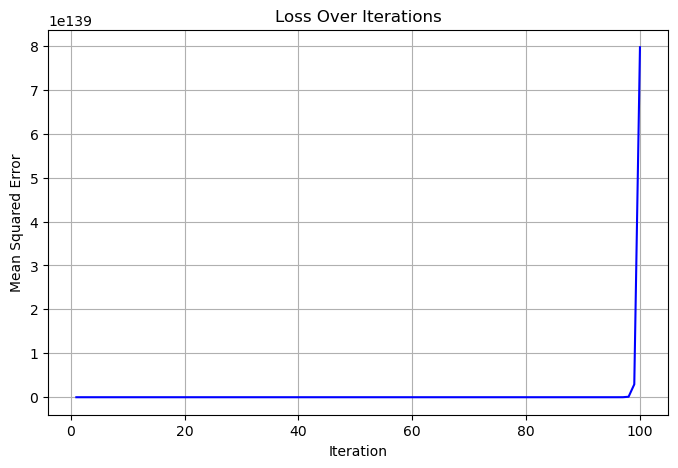

In [11]:
# Plot the loss over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), loss_history, color='blue')
plt.title("Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

In [12]:
# EXAMPLE WITH MORE FEATURES


# Generate data

num_samples = 1000000
num_features = 100
X, y, true_weights, true_bias = generate_dataset(num_samples, num_features)
#print("True Weights:", true_weights)
#print("True Bias:", true_bias)

# Generated data
#print("X: ",X)
#print("y: ",y)

In [13]:
# Matrix Inversion Solution
start_time1 = time.time()
w_vector = matrix_inversion_solution(X, y)
matrix_inv_time = time.time() - start_time1
    
print("Time taken by matrix inversion solution: ",matrix_inv_time," seconds")
print("Matrix Inversion solution: ",w_vector)

# Here the first component of w_vector is the bias and the remaining components are the weights

print("\nBias computed by matrix inversion solution: ", w_vector[0])
print("Weights computed by matrix inversion solution: ", w_vector[1:len(w_vector)])

Time taken by matrix inversion solution:  0.612541913986206  seconds
Matrix Inversion solution:  [[-0.47035733]
 [ 0.07236216]
 [-0.70890198]
 [ 1.02408848]
 [-0.20893663]
 [-0.58800978]
 [-0.78770213]
 [ 1.25042125]
 [ 0.0379683 ]
 [-0.18333683]
 [ 1.38722239]
 [ 0.7155296 ]
 [ 0.34460263]
 [ 0.52700188]
 [ 0.57864841]
 [ 0.40323776]
 [-0.12073347]
 [-0.22749407]
 [ 0.09622231]
 [-0.45780989]
 [-0.26775996]
 [-0.05018586]
 [ 0.68744753]
 [-0.90270966]
 [ 0.47394301]
 [ 0.02614997]
 [ 2.32932841]
 [ 0.76745712]
 [ 0.7107592 ]
 [-0.99350583]
 [ 0.78243294]
 [ 0.12332964]
 [ 0.70721043]
 [-1.00214578]
 [ 0.78698537]
 [ 1.05862281]
 [-0.08038793]
 [-2.51360546]
 [ 0.82283048]
 [ 0.06531718]
 [-0.96152391]
 [-1.34789551]
 [-0.20268546]
 [ 0.93998128]
 [-2.18589217]
 [-0.76391836]
 [ 0.48611845]
 [ 0.22513662]
 [-0.86220397]
 [-0.71029529]
 [-1.08070813]
 [ 1.34945356]
 [-0.99287772]
 [ 0.79634596]
 [ 0.72387508]
 [ 0.18583454]
 [ 0.09375813]
 [ 0.64843155]
 [-0.82233619]
 [-0.04987975]
 [ 

In [30]:
# Perform Gradient Descent
learning_rate = 0.1
num_iterations = 100

start_time2 = time.time()
learned_weights, learned_bias, loss, loss_history = gradient_descent(X, y, learning_rate, num_iterations)

gradient_descent_time = time.time() - start_time2
print("\nTime taken by gradient descent: ", gradient_descent_time," seconds")
    
print("\nLearned Weight:", learned_weights)
print("Learned Bias:", learned_bias)


# Compare true and learned weights and bias
#print("\nDifference between true and learned biases:", true_bias - learned_bias)          
#print("\nDifference between true and learned weights:", true_weights - learned_weights)   


print("Loss (Mean squared error) with the learned weight and learned bias:", loss)


Time taken by gradient descent:  10.865133047103882  seconds

Learned Weight: [ 0.07236216 -0.70890198  1.02408848 -0.20893663 -0.58800978 -0.78770213
  1.25042125  0.0379683  -0.18333683  1.38722239  0.7155296   0.34460263
  0.52700188  0.57864841  0.40323776 -0.12073347 -0.22749407  0.09622231
 -0.45780989 -0.26775996 -0.05018586  0.68744753 -0.90270966  0.47394301
  0.02614997  2.32932841  0.76745712  0.7107592  -0.99350583  0.78243294
  0.12332964  0.70721043 -1.00214578  0.78698537  1.05862281 -0.08038793
 -2.51360546  0.82283048  0.06531718 -0.96152391 -1.3478955  -0.20268546
  0.93998128 -2.18589217 -0.76391836  0.48611845  0.22513662 -0.86220397
 -0.71029529 -1.08070813  1.34945356 -0.99287772  0.79634596  0.72387508
  0.18583454  0.09375813  0.64843155 -0.82233619 -0.04987975  0.56920024
 -1.23977116  0.65946609  0.80773606 -1.00254917 -0.57937736 -0.86627622
  1.41763314  0.70371302 -3.04198049 -0.39001733  0.80446459  0.37831703
  0.98442254 -1.06361509  1.0954579   1.68472

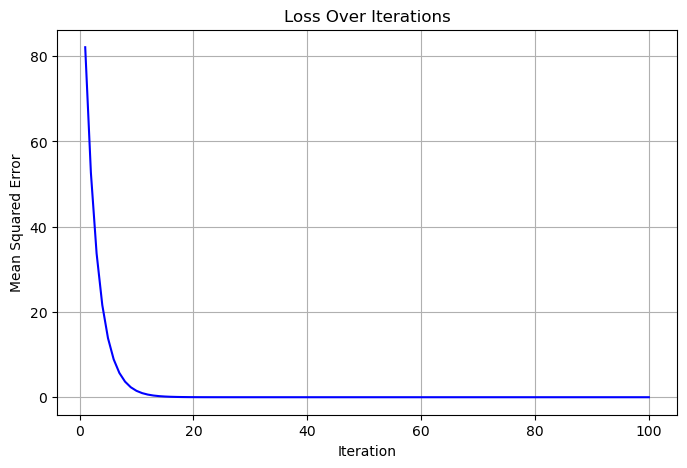

In [16]:
# Plot the loss over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), loss_history, color='blue')
plt.title("Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

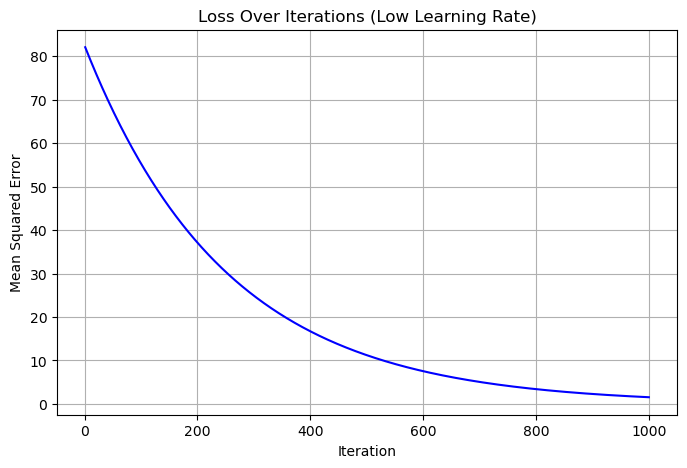

1.527231186808584


In [36]:
learning_rate_low = 0.001
num_iterations = 1000

learned_weights_low, learned_bias_low, loss_low, loss_history_low = gradient_descent(X, y, learning_rate_low, num_iterations)

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), loss_history_low, color='blue')
plt.title("Loss Over Iterations (Low Learning Rate)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()
print(loss_low)


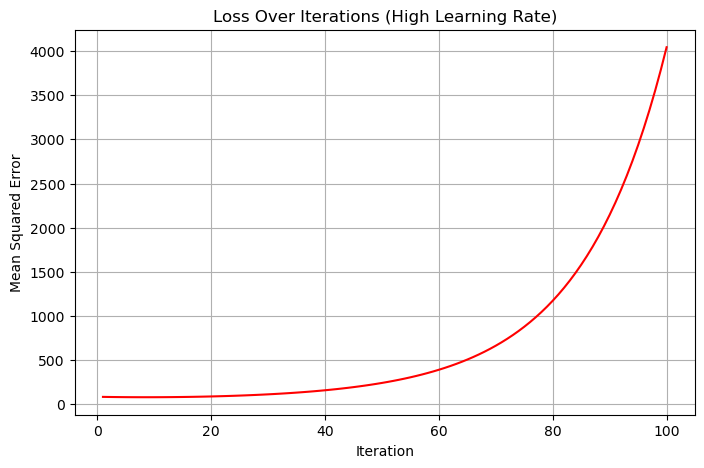

4315.345881650846


In [37]:
learning_rate_high = 1.0
num_iterations = 100

learned_weights_high, learned_bias_high, loss_high, loss_history_high = gradient_descent(X, y, learning_rate_high, num_iterations)

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations + 1), loss_history_high, color='red')
plt.title("Loss Over Iterations (High Learning Rate)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()
print(loss_high)


In [39]:
#so for matrix inversion, its the features are the ones that are using raw compute as X^t is an NxN square matrix where
#n is the number of features. hence higher features slower matrix inversion

num_samples_large = 1000
num_features_large = 1000
X_large, y_large, true_weights_large, true_bias_large = generate_dataset(num_samples_large, num_features_large)

# Measure time for matrix inversion
start_time_matrix = time.time()
w_vector_large = matrix_inversion_solution(X_large, y_large)
matrix_inv_time_large = time.time() - start_time_matrix

# Measure time for gradient descent
learning_rate = 0.01
num_iterations = 1000
start_time_gd = time.time()
learned_weights_large, learned_bias_large, loss_large, loss_history_large = gradient_descent(X_large, y_large, learning_rate, num_iterations)
gradient_descent_time_large = time.time() - start_time_gd

print("matrix inversion solution: ", matrix_inv_time_large,)
print("gradient descent: ", gradient_descent_time_large,)


matrix inversion solution:  7.956783056259155
gradient descent:  0.6097109317779541


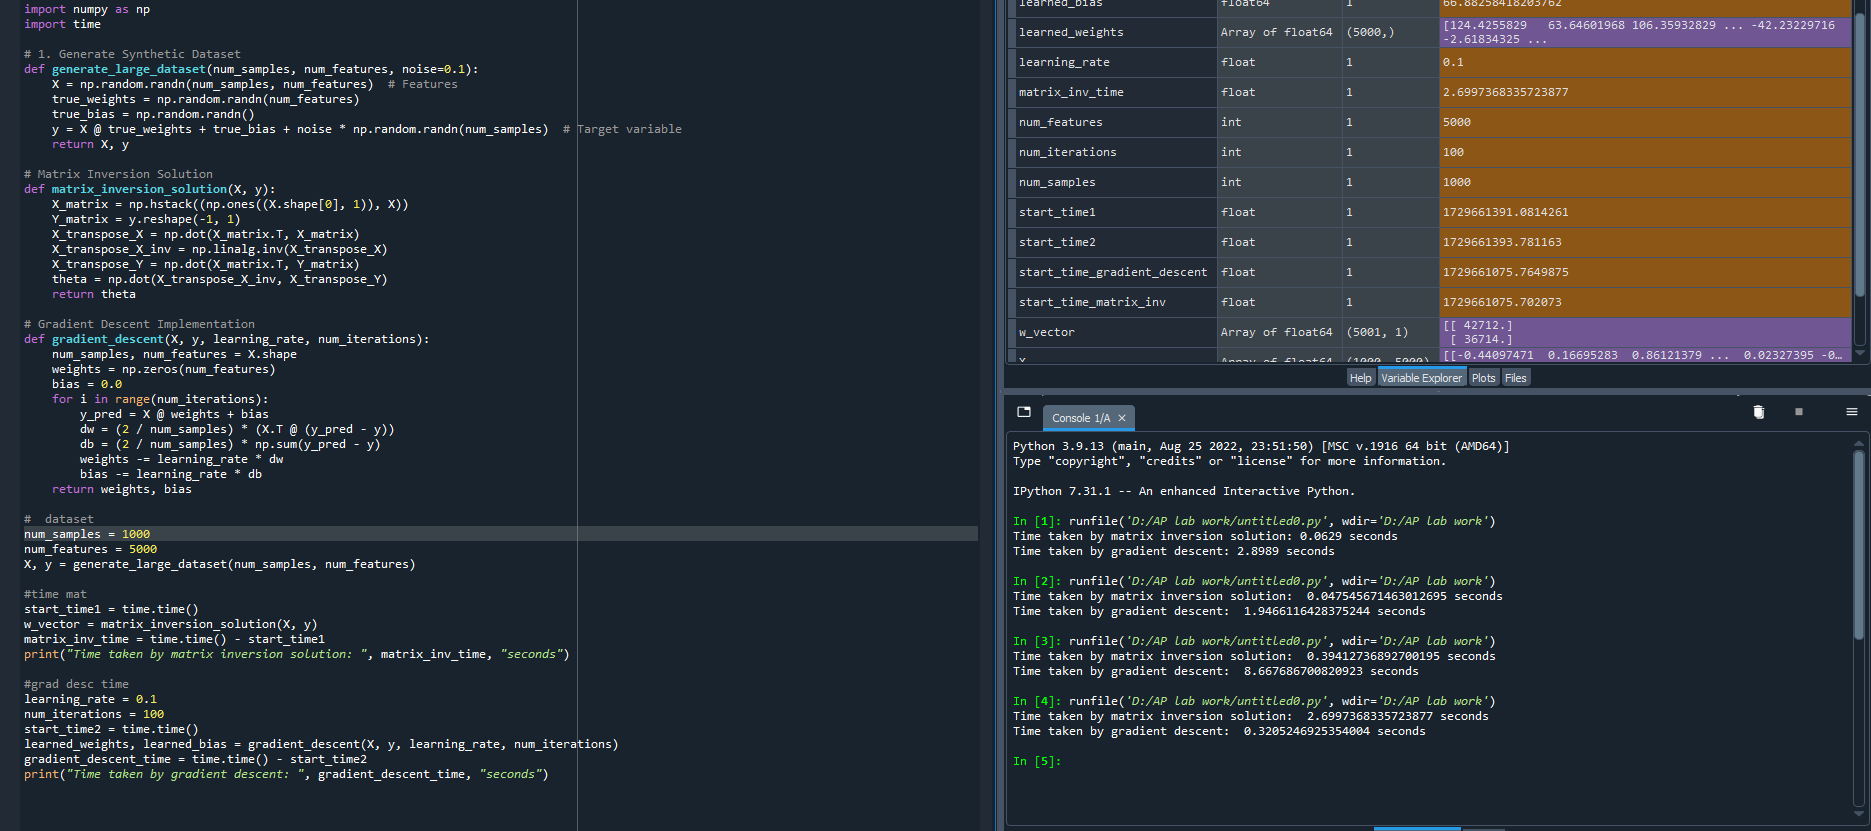

we see here that varying parameter feature leads to faster times